### Column Info
- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
- weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- cnt: count of total rental bikes including both casual and registered
---

### Rule:
1. Gunakan Tabel Correlation Matrix dan HeatMap
2. Gunakan Teknik Visualisasi yang tepat
3. Gunakan minimal 3 Algoritma dan bandingkan kinerjanya
4. Gunakan Matrik Evaluasi yang tepat
5. Usahakan nilai prediksi seakurat mungkin

### Project 4 -- Rizki Yoga Marsyamni -- 01123956111-33

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline 
warnings.filterwarnings('ignore')
pd.options.display.max_columns=100

In [2]:
df = pd.read_csv('bike.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [3]:
df1=df.rename(columns={'dteday':'datetime','yr':'year','mnth':'month','hr':'hour','workingday':'working_day','weathersit':'weather_situation','temp':'temperature','atemp':'air_temperature','hum':'humidity','cnt':'count'})
df1

,instant,datetime,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,air_temperature,humidity,windspeed,count
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,17376,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,17377,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,17378,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [4]:
df1=df1.drop(['instant'], axis=1)
df1


,datetime,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,air_temperature,humidity,windspeed,count
0,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,12/31/2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,119
17375,12/31/2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,89
17376,12/31/2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,90
17377,12/31/2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,61


In [5]:
df1.columns.unique()

Index(['datetime', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'working_day', 'weather_situation', 'temperature', 'air_temperature',
       'humidity', 'windspeed', 'count'],
      dtype='object')

In [6]:
df1.shape

(17379, 14)

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   datetime           17379 non-null  object 
 1   season             17379 non-null  int64  
 2   year               17379 non-null  int64  
 3   month              17379 non-null  int64  
 4   hour               17379 non-null  int64  
 5   holiday            17379 non-null  int64  
 6   weekday            17379 non-null  int64  
 7   working_day        17379 non-null  int64  
 8   weather_situation  17379 non-null  int64  
 9   temperature        17379 non-null  float64
 10  air_temperature    17379 non-null  float64
 11  humidity           17379 non-null  float64
 12  windspeed          17379 non-null  float64
 13  count              17379 non-null  int64  
dtypes: float64(4), int64(9), object(1)
memory usage: 1.9+ MB


In [8]:
df1.describe()

,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,air_temperature,humidity,windspeed,count
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,189.463088
std,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,181.387599
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,40.000000
50%,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,142.000000
75%,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,281.000000
max,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,977.000000


In [9]:
heatmap_df= df1.corr()
heatmap_df

,season,year,month,hour,holiday,weekday,working_day,weather_situation,temperature,air_temperature,humidity,windspeed,count
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.178056
year,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.250495
month,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.120638
hour,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.026900
working_day,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,0.030284
weather_situation,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.142426
temperature,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.404772
air_temperature,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.400929


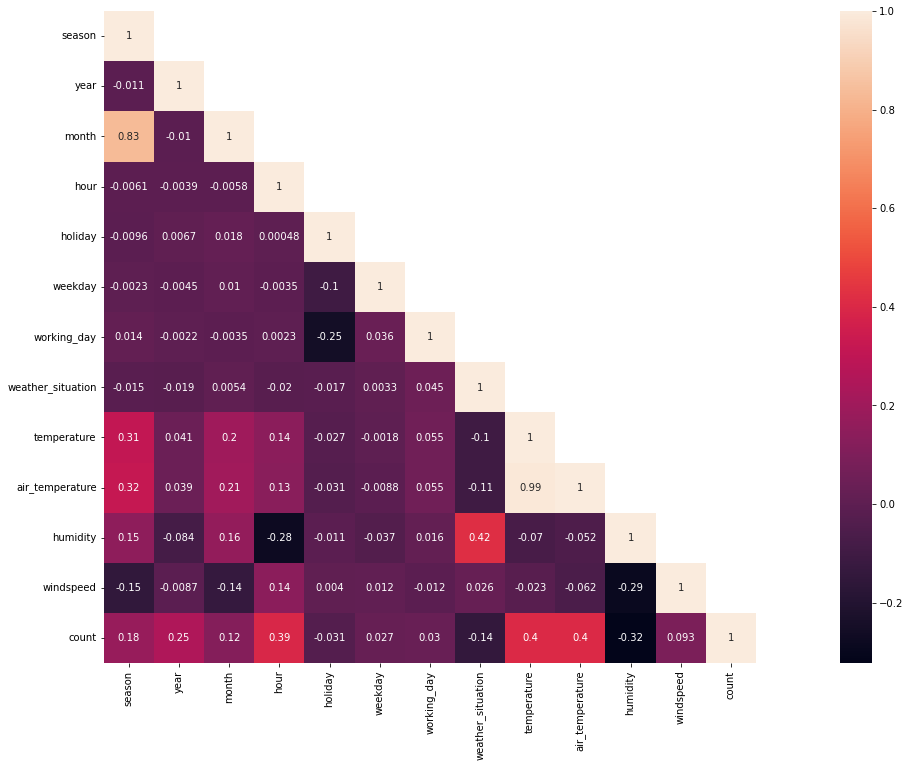

In [11]:
#Corelation matrix.
cor_mat= df1[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)
plt.show()



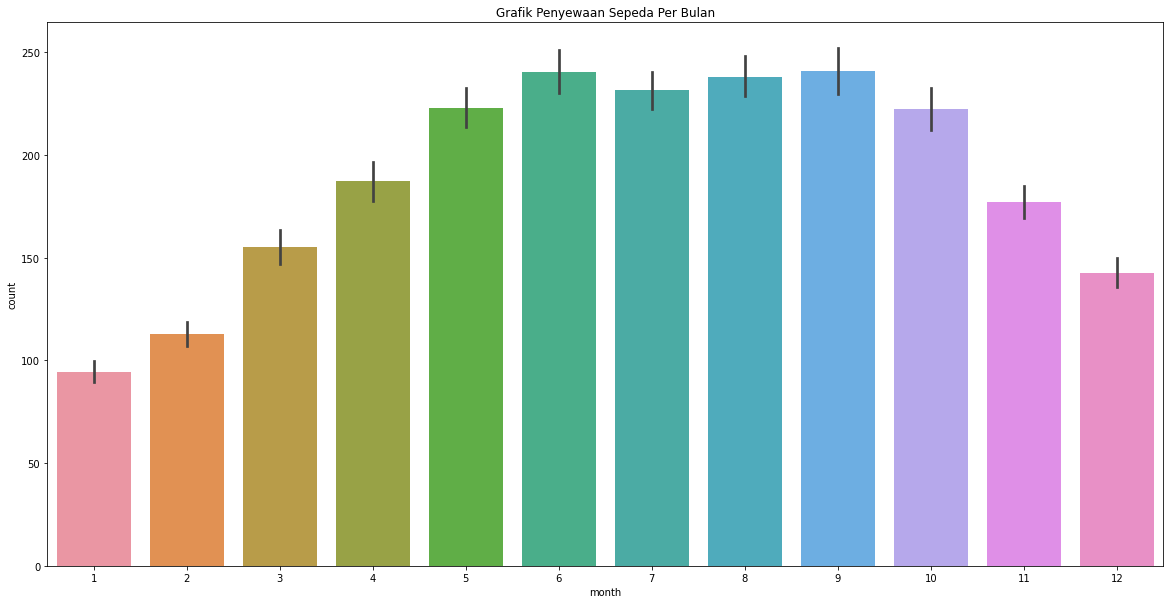

In [12]:
#sns.factorplot(x="month", y="count", data=df1, kind='bar', size=6, aspect=2)
fig, ax = plt.subplots(figsize=(20, 10))
sns.barplot(data=df1, x='month', y='count', ax=ax)
ax.set(title="Grafik Penyewaan Sepeda Per Bulan")
plt.show()


### Chart diatas merupakan gambaran kasar dari total peminjaman sepeda tiap bulannya

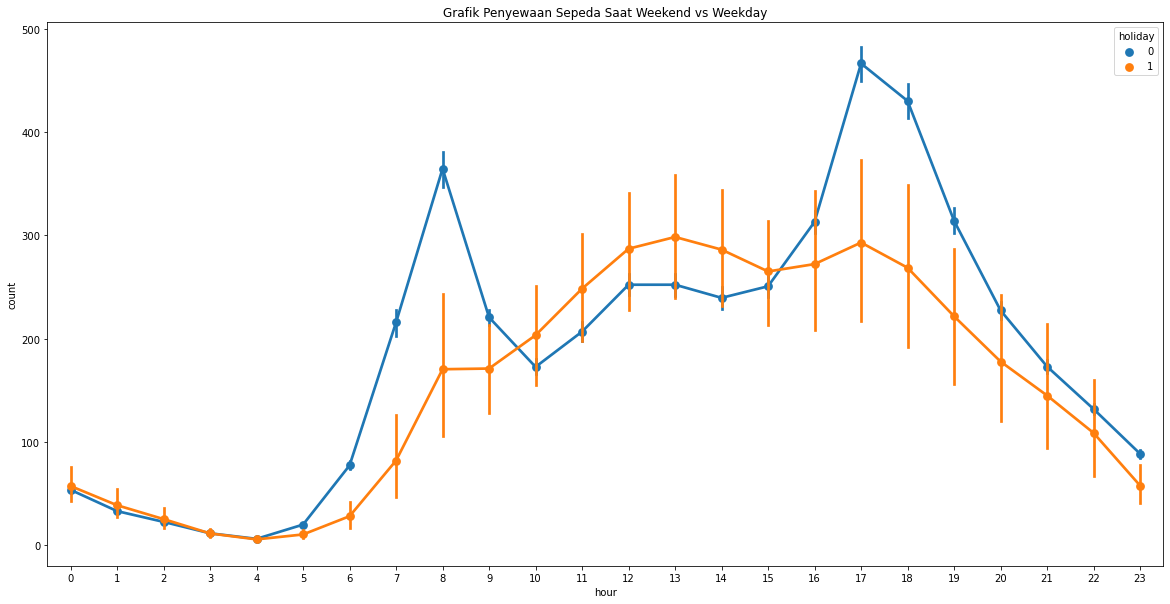

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df1, x='hour', y='count', hue='holiday', ax=ax)
ax.set(title="Grafik Penyewaan Sepeda Saat Weekend vs Weekday")
plt.show()


### Data diatas merupakan Perbandingan Total Penggunaan Sepeda pada *Weekend* vs *Weekday* (tiap jamnya)
- Dapat dilihat bahwa jumlah penyewaan sepeda cenderung meningkat di jam 7 pagi s.d. 5 sore
- Menarik dilihat bahwa penyewaan sepeda pada weekday(0) meningkat di jam sibuk/*rush hour* (7-9 pagi dan 4-6 sore)
- untuk penjabaran lebih lengkapnya dapat dilihat pada grafik dibawah


### Keterangan:
- 0 = weekday
- 1 = weekend

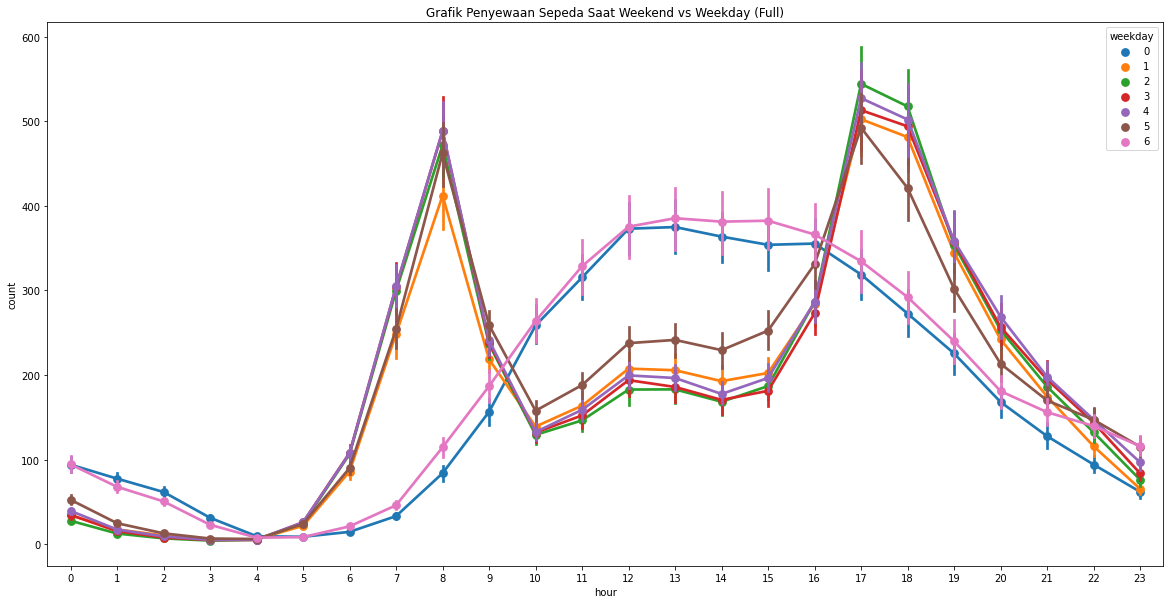

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df1, x='hour', y='count', hue='weekday', ax=ax)
ax.set(title="Grafik Penyewaan Sepeda Saat Weekend vs Weekday (Full)")
plt.show()

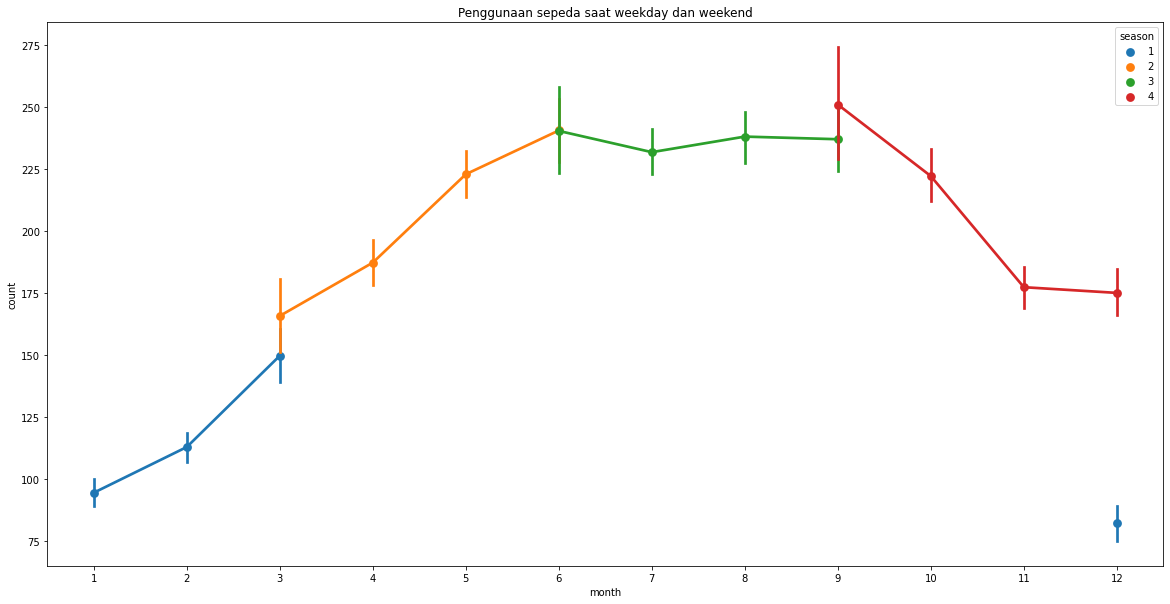

In [15]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.pointplot(data=df1, x='month', y='count', hue='season', ax=ax)
ax.set(title="Penggunaan sepeda saat weekday dan weekend")
plt.show()


Dari data diatas dapat disimpulkan:
- Season 1 (Winter), jumlah sepada yang disewakan rata2 perbulannya *paling rendah* (bulan januari s.d. maret) dikarenakan memang musim dingin orang cenderung kurang menggunakan transportasi sepeda
- Season 3 (Summer), jumlah sepada yang disewakan rata2 perbulannya *paling tinggi* (bulan juni s.d. september) dikarenakan memang musim semi, cuaca cenderung hangat dan bersahabat, memungkinkan orang untuk menyewa sepeda(intensitas penggunaan sepeda lebih tinggi)

# *Machine Learning for Prediction*

In [5]:
# Mendefinisikan data sepeda
df_ml=df1.drop(columns=['datetime', 'year'])
df_ml.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             17379 non-null  int64  
 1   month              17379 non-null  int64  
 2   hour               17379 non-null  int64  
 3   holiday            17379 non-null  int64  
 4   weekday            17379 non-null  int64  
 5   working_day        17379 non-null  int64  
 6   weather_situation  17379 non-null  int64  
 7   temperature        17379 non-null  float64
 8   air_temperature    17379 non-null  float64
 9   humidity           17379 non-null  float64
 10  windspeed          17379 non-null  float64
 11  count              17379 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 1.6 MB


In [11]:
cols= ['season', 'month', 'hour', 'holiday','weekday', 'working_day', 'weather_situation']

for col in cols:
    df_ml[col]= df_ml[col].astype('category')
    df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   season             17379 non-null  category
 1   month              17379 non-null  int64   
 2   hour               17379 non-null  int64   
 3   holiday            17379 non-null  int64   
 4   weekday            17379 non-null  int64   
 5   working_day        17379 non-null  int64   
 6   weather_situation  17379 non-null  int64   
 7   temperature        17379 non-null  float64 
 8   air_temperature    17379 non-null  float64 
 9   humidity           17379 non-null  float64 
 10  windspeed          17379 non-null  float64 
 11  count              17379 non-null  int64   
dtypes: category(1), float64(4), int64(7)
memory usage: 1.5 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column             Non-Null 

In [6]:
df_ml.head()

,season,month,hour,holiday,weekday,working_day,weather_situation,temperature,air_temperature,humidity,windspeed,count
0,1,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,1,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,1,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,1,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,1,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [7]:
from sklearn.model_selection import train_test_split

In [56]:
# menempatkan features and target ke dalam masing2 variabel X dan y
X = np.array(df_ml[['season','month','hour','holiday','weekday','working_day','weather_situation','temperature','humidity']])
#X = np.array(df_ml['season']).reshape(-1,1)
y = np.array(df_ml['count'])

# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)








In [9]:
#  Import model yang digunakan
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR


# Mengimport parameter penilaian akurasi metode
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


### KNN

In [71]:
model_KNN= KNeighborsRegressor(n_neighbors=3)
model_KNN.fit(X_train, y_train)

y_pred = model_KNN.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

#uji akurasi model (hasilnya sama dengan r squared)
print("akurasi model: ",model_KNN.score(X_test, y_test))


r-squared: 0.78837018470333
Mean Absolute Error:  55.76064441887227
Mean Squared Error:  7265.626816690108
akurasi model:  0.78837018470333


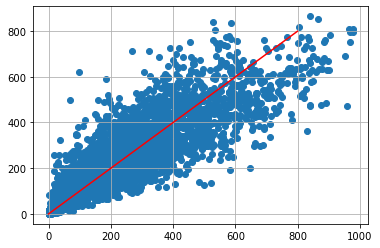

In [65]:
plt.scatter(y_test,y_pred)
plt.plot(np.arange(0,800), np.arange(0,800), color ="red")
plt.grid(True)

### Model Linear Regression

In [79]:
model_L_reg = LinearRegression()
model_L_reg.fit(X_train, y_train)

y_pred = model_L_reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

#uji akurasi model (hasilnya sama dengan r squared)
print("akurasi model: ", model_L_reg.score(X_test, y_test))


r-squared: 0.3378432683651885
Mean Absolute Error:  110.40952808907045
Mean Squared Error:  22733.014719469258
akurasi model:  0.3378432683651885


In [ ]:
#untuk testing, ganti X dengan 1 label saja, jangan multi label, karena untuk plot 2D hanya punya 2 komponen, X dan Y
plt.scatter(X_train, y_train)
plt.plot(X_train, model_L_reg.predict(X_train), color="red" )

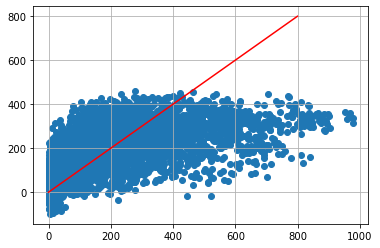

In [63]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


### Model Random Forest Regressor

In [74]:
model_Random_F_R = RandomForestRegressor()
model_Random_F_R.fit(X_train, y_train)

y_pred = model_Random_F_R.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

#uji akurasi model (hasilnya sama dengan r squared)
print("akurasi model: ", model_Random_F_R.score(X_test, y_test))


r-squared: 0.8584465682915058
Mean Absolute Error:  45.326171328261516
Mean Squared Error:  4859.780310132558
akurasi model:  0.8584465682915058


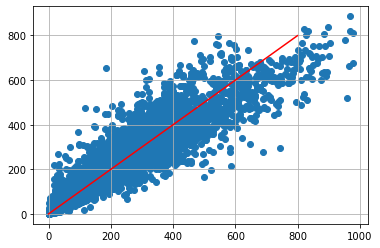

In [26]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


### Model Bagging Regressor

In [27]:
model_B_Reg = BaggingRegressor()
model_B_Reg.fit(X_train, y_train)

y_pred = model_B_Reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

r-squared: 0.8469973186626089
Mean Absolute Error:  46.783329680165124
Mean Squared Error:  5252.853351462202


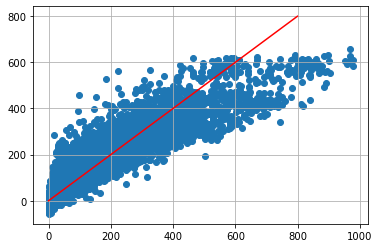

In [32]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


### Model Gradient Boosting Regressor

In [33]:
model_Grad_Boost_Reg = GradientBoostingRegressor()
model_Grad_Boost_Reg.fit(X_train, y_train)

y_pred = model_Grad_Boost_Reg.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

r-squared: 0.7884972451009856
Mean Absolute Error:  58.466329428742284
Mean Squared Error:  7261.264607937752


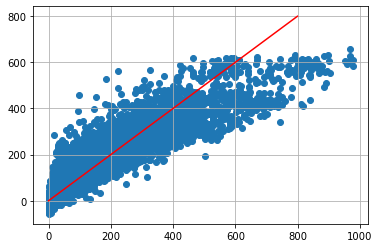

In [34]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


### Model Ada Boost Regressor

In [36]:
model_Ada_Boost_Reg = AdaBoostRegressor()
model_Ada_Boost_Reg .fit(X_train, y_train)

y_pred = model_Ada_Boost_Reg .predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

r-squared: 0.5949656685843121
Mean Absolute Error:  91.82881103315309
Mean Squared Error:  13905.546795892678


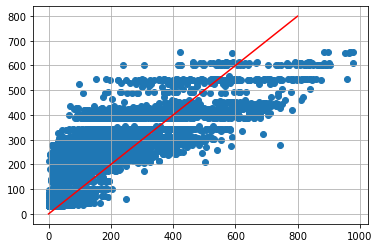

In [38]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


### Model SVR

In [39]:
model_SVR = SVR()
model_SVR.fit(X_train, y_train)

y_pred = model_SVR.predict(X_test)

r_squared = r2_score(y_test, y_pred)
print("r-squared:", r_squared)

MAE = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", MAE)

MSE = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ", MSE)

r-squared: 0.33891584419280907
Mean Absolute Error:  95.87276810804943
Mean Squared Error:  22696.19128943806


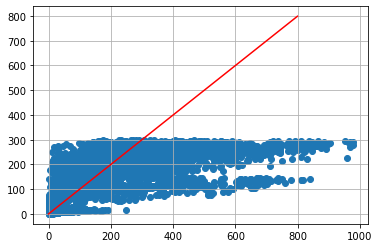

In [40]:
plt.scatter(y_test, y_pred)
plt.plot(np.arange(0, 800), np.arange(0, 800), color="red")
plt.grid(True)


In [31]:
models=[model_KNN, model_L_reg, model_Random_F_R, model_B_Reg, model_Grad_Boost_Reg, model_Ada_Boost_Reg, model_SVR]
r_Squared_all=[]
for model in models:
    y_preds=model.predict(X_test)
    rsquared=r2_score(y_test,y_preds)
    r_Squared_all.append(rsquared)

print(r_Squared_all)  


[0.78837018470333, 0.3378432683651885, 0.8581500920361161, 0.8467182106183206, 0.7884972451009856, 0.5905592265224184, 0.33891584419280907]


### Perbandingan efektifitas tiap model

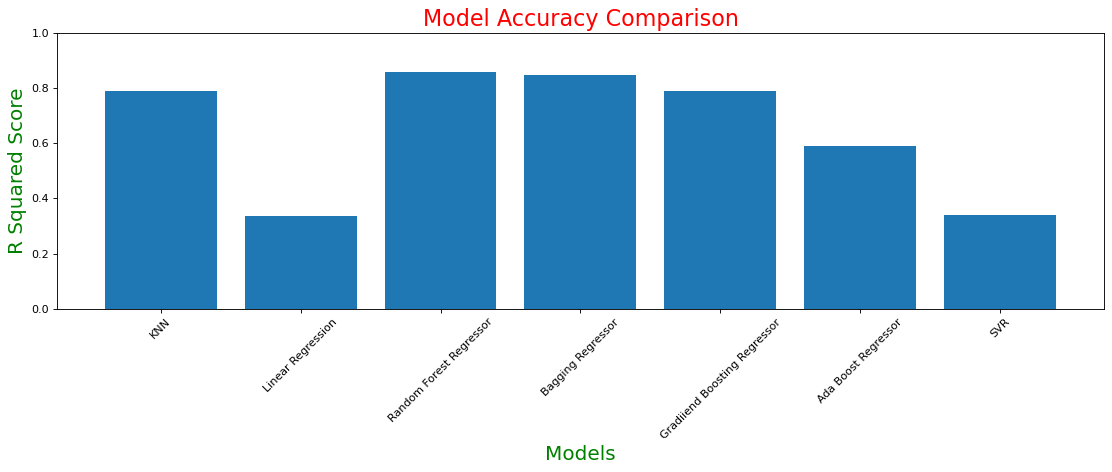

In [32]:
plt.figure(figsize=(14,6), dpi=80)
plt.bar(['KNN', 'Linear Regression', 'Random Forest Regressor', 'Bagging Regressor','Gradiiend Boosting Regressor', 'Ada Boost Regressor', 'SVR'], r_Squared_all)
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.title("Model Accuracy Comparison", fontsize=20, color='r')
plt.xlabel('Models', fontsize=18, color='g')
plt.ylabel('R Squared Score', fontsize=18, color='g')
plt.tight_layout()
plt.show()


# *Kesimpulan*
- Dari 6 Model yang ditest, model yang menghasilkan akurasi terbaik (menggunakan nilai R squared score) adalah  *Random Forest Regressor*
- Model yang menghasilkan akurasi terendah dalam case ini adalah *Linear Regression*